<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
df = pd.read_csv(sac_csv)

In [4]:
df.shape

(985, 12)

In [5]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
df.shape

(985, 12)

In [7]:
df.isnull().info() # identify if there any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null bool
city         985 non-null bool
zip          985 non-null bool
state        985 non-null bool
beds         985 non-null bool
baths        985 non-null bool
sq__ft       985 non-null bool
type         985 non-null bool
sale_date    985 non-null bool
price        985 non-null bool
latitude     985 non-null bool
longitude    985 non-null bool
dtypes: bool(12)
memory usage: 11.6 KB


In [8]:
df.rename(columns={'sq__ft':'area'}, inplace=True) # rename 'sq__ft' to 'area

In [9]:
df.head()

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [10]:
df['zip'] = df['zip'].astype(str) # change zipcode to string type

In [11]:
df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
area           int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
df[df['area'] <= 0] # there are lots of rows with areas of 0

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378


In [13]:
df[df['price'] <= 0] #one house has an area and price in the negative range

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [14]:
df.set_value(703, 'area', 984) # set the area value to positive
df.set_value(703, 'price', 210944) # set price to positive

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [15]:
df= df[df['area'] > 0] # created a new data frame without 0 values area column

In [16]:
df.head()

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [17]:
df.shape

(814, 12)

In [18]:
df[df['area'] <= 0] # checked to see if any more rows have areas less than 0

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude


In [67]:
df[df['price'] <= 0]

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude


In [21]:
df.loc['latitude'] = df['latitude'].round(2) # rounded all the latitudes and longitudes to two decimal points
df.loc['longitude'] = df['longitude'].round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
df.head()

,street,city,zip,state,beds,baths,area,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1.0,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3.0,1.0,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212.0,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2.0,1.0,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880.0,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2.0,1.0,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307.0,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2.0,1.0,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900.0,38.519470,-121.435768


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [23]:
# A area, beds and baths would be a good predictor of price

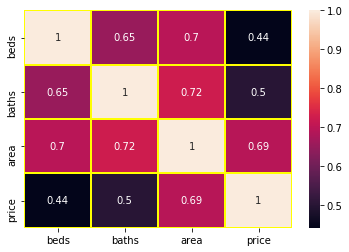

In [45]:
corr_df = df[['beds', 'baths', 'area', 'price']].corr()

mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, annot=True, linewidth=1, linecolor='yellow')

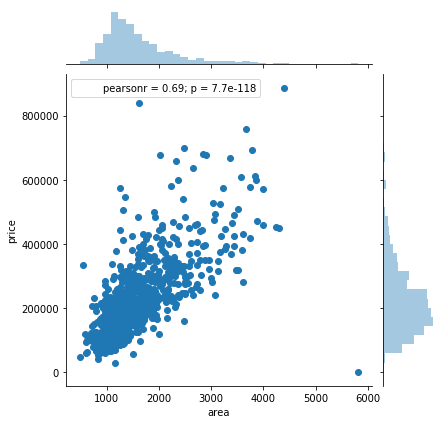

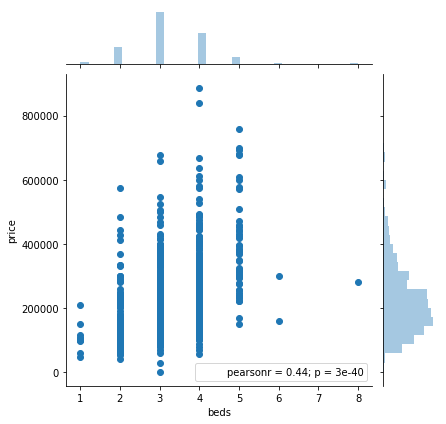

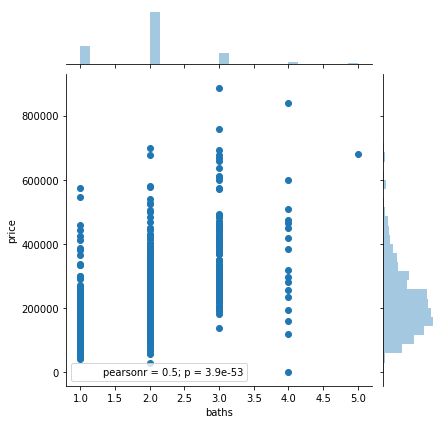

In [54]:
sns.jointplot(df['area'], df['price'])
sns.jointplot(df['beds'], df['price'])
sns.jointplot(df['baths'], df['price'])

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [24]:
# A: area would be the best predictor as there is a higher correlation between that and price
# beds and baths are a discrete variable while area is a continuous

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [77]:
df = df.drop(['latitude', 'longitude'])

In [80]:
df.tail()
df.shape

(814, 12)

In [86]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

In [87]:
x = df[['area']]
y = df[['price']]
model = lm.fit(x,y)

In [88]:
predictions = model.predict(x)

In [89]:
score = model.score(x,y)

In [90]:
r2 = r2_score(y, predictions)

In [91]:
r2

0.48123071333269007

the correlation coefficient is 0.481230713333


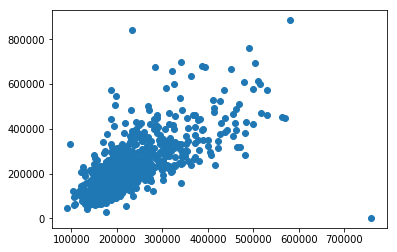

In [95]:
plt.scatter(predictions, y)
print('the correlation coefficient is ' + str(r2))

In [109]:
print('the intercept is: ', model.intercept_)

the intercept is:  [ 30210.63386692]


In [114]:
print('the coefficient is ', str(model.coef_))

the coefficient is  [[ 125.21648668]]


In [101]:
print('r square ', model.score(x,y))

r square  0.481230713333


In [120]:
rmse = np.sqrt(mean_squared_error(y, predictions))
print('RMSE: ', rmse)

RMSE:  86252.1091748


### 6. Interpret the intercept. Interpret the slope.

In [26]:
# A: the intercept is the price of the houses with zero sq ft. it offsets the regression line

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [27]:
# A: Could be used to predict pricing for houses for another real estate agency based on their housing data

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [130]:
import sklearn.metrics
import matplotlib.pyplot as plt
residuals = rf.predict(x)
r

NameError: name 'rf' is not defined

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 86251.60917481,  86251.70917481,  86251.80917481,  86251.90917481,
         86252.00917481,  86252.10917481,  86252.20917481,  86252.30917481,
         86252.40917481,  86252.50917481,  86252.60917481]),
 <a list of 10 Patch objects>)

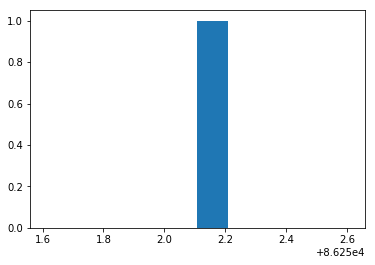

In [131]:
plt.hist(rmse)